In [1]:
library(reticulate)
library(bigrquery)
library(ggplot2)
library(tidyverse)
#library(ggpubr)
#library(vcfR)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
fapi = import('firecloud.api')

In [3]:
BILLING_PROJECT_ID = Sys.getenv('GOOGLE_PROJECT')       # terra-7a376e4e
WORKSPACE_BUCKET = Sys.getenv('WORKSPACE_BUCKET')       # gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34
WORKSPACE_NAME = Sys.getenv('WORKSPACE_NAME')           # AoU_DRC_WGS_LongReads_PacBio
WORKSPACE_NAMESPACE = Sys.getenv('WORKSPACE_NAMESPACE') # allofus-drc-wgs-lr-prod

In [4]:
load_workspace_table <- function(table_name, workspace_namespace=WORKSPACE_NAMESPACE, workspace_name=WORKSPACE_NAME) {
    a = fapi$get_entities(WORKSPACE_NAMESPACE, WORKSPACE_NAME, table_name)

    json = a$json()
    df = tibble(metadata = json) %>% unnest_wider(metadata) %>% unnest_wider(attributes)

    for (name in df %>% select(where(is.list)) %>% names()) {
        #print(df[,name])
        q = as.vector(unlist(df[,name])) %in% c("true", "TRUE", "false", "FALSE") %>% unique()
        if (q) {
            df[,name] = as.logical(as.vector(unlist(df[,name])))
        }
    }
    
    return(df)
}

In [5]:
ha_sample_t2t_df = load_workspace_table('ha-sample-t2t')

In [6]:
ha_sample_t2t_df

hifiasm_hap2,clair_gvcf,pbsv_vcf,aligned_num_bases,clair_gtbi,pav_metrics,dvp_phased_vcf,aligned_read_length_N50,dvp_qual_filtered_vcf_tbi,dvp_qual_filtered_vcf,⋯,dvp_g_tbi,sniffles2_snf,aligned_bai,pav_structural_variant_stats,average_identity,COV_sum,clair3_tbi,dvp_structural_variant_stats,entityType,name
<chr>,<chr>,<chr>,<dbl>,<chr>,<list>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1457759/assembly/1457759.haploTigs/1457759.bp.hap2.p_ctg.fa.gz,NA,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1457759/variants/sv/1457759.pbsv.vcf.gz,-725966821,NA,"0, 0, 8457, 8457, 6824, 162, 1465, 6, 0, 0, 0, 0, 0, 0, 9207, 9207, 7211, 131, 1865, 0, 5, 5, 0, 5, 0, 0, 0, 0",gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1457759/variants/small/1457759.deepvariant_pepper.phased.vcf.gz,17996,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1457759/variants/small/1457759.deepvariant_pepper.phased.QualFT-40.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1457759/variants/small/1457759.deepvariant_pepper.phased.QualFT-40.vcf.gz,⋯,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1457759/variants/small/1457759.deepvariant_pepper.g.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1457759/variants/sv/1457759.sniffles2.snf,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1457759/alignments/1457759.bam.bai,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1457759/pav_1457759.stats.txt,99.1,8.08,NA,NA,ha-sample-t2t,1457759
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1600374/assembly/1600374.haploTigs/1600374.bp.hap2.p_ctg.fa.gz,NA,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1600374/variants/sv/1600374.pbsv.vcf.gz,-1239994497,NA,"0, 0, 8494, 8494, 6956, 164, 1368, 6, 0, 0, 0, 0, 0, 0, 8794, 8794, 7046, 109, 1639, 0, 2, 2, 0, 1, 0, 1, 0, 0",gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1600374/variants/small/1600374.deepvariant_pepper.phased.vcf.gz,16962,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1600374/variants/small/1600374.deepvariant_pepper.phased.QualFT-40.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1600374/variants/small/1600374.deepvariant_pepper.phased.QualFT-40.vcf.gz,⋯,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1600374/variants/small/1600374.deepvariant_pepper.g.vcf.gz.tbi,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1600374/variants/sv/1600374.sniffles2.snf,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1600374/alignments/1600374.bam.bai,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/SummarizeStructuralVariants/1600374/pav_1600374.stats.txt,99.2,7.92,NA,NA,ha-sample-t2t,1600374
gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/ref_free/PBAssembleWithHifiasm/1637473/assembly/1637473.haploTigs/1637473.bp.hap2.p_ctg.fa.gz,NA,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1637473/variants/sv/1637473.pbsv.vcf.gz,1542019432,NA,"0, 0, 8039, 8039, 6541, 145, 1347, 6, 0, 0, 0, 0, 0, 0, 8402, 8402, 6785, 100, 1517, 0, 4, 4, 0, 4, 0, 0, 0, 0",gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1637473/variants/small/1637473.deepvariant_pepper.phased.vcf.gz,17467,gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/T2T/PBCCSWholeGenome/1637473/variants/small/1637473.deepvariant_pepper.phased.QualFT-40.vcf.gz.tbi,gs://fc-secure-f7d80b4

In [7]:
nrow(ha_sample_t2t_df)

[1] 1763

In [8]:
system("wget -O broad_10k_sample_selection.csv https://www.dropbox.com/s/wv3sesy644ncbvr/broad_10k_sample_selection.csv?dl=0", intern=TRUE)


character(0)

In [9]:
broad10k_df = read_delim("broad_10k_sample_selection.csv", delim=",")

Rows: 767 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): exclude, date_of_birth, gender, sex_at_birth, ancestry_pred_other,...
dbl (12): family_id, research_id, parent_sample_id, Sample_id, Contamination...
lgl  (3): sequencing_at_UW, overlap_selected_sr, ont_data

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
broad10k_df

family_id,research_id,exclude,date_of_birth,gender,sex_at_birth,ancestry_pred_other,probabilities,biobank_id,parent_sample_id,⋯,Volume (uL),dsDNA Conc (ng/uL),Total DNA conc (ng/uL),260/230,260/280,Extraction,sequencing_at_UW,overlap_selected_sr,target_coverage,ont_data
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>
4,1014977,NA,1975-06-15 00:00:00 UTC,Male,Male,eas,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",A936562047,19136005610,⋯,485,144.63,151.01,2.34,1.84,Autogen,FALSE,TRUE,30,TRUE
4,1442969,NA,1945-06-15 00:00:00 UTC,Female,Female,eas,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",A674036515,19136002089,⋯,333,85.54,87.14,2.22,1.81,Autogen,FALSE,FALSE,30,TRUE
4,2186848,NA,1945-06-15 00:00:00 UTC,Female,Male,eas,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",A918160357,19136002080,⋯,333,95.20,95.51,2.35,1.82,Autogen,FALSE,FALSE,30,TRUE
21,1083277,NA,1991-06-15 00:00:00 UTC,Female,PMI: Skip,eur,"[0.01, 0.17, 0.01, 0.81, 0.0, 0.0]",A877717679,20064010105,⋯,538,113.70,157.20,1.51,1.93,Chemagen,FALSE,FALSE,30,TRUE
21,1160210,NA,1961-06-15 00:00:00 UTC,PMI: Skip,Female,eur,"[0.0, 0.16, 0.01, 0.83, 0.0, 0.0]",A672077137,20064009658,⋯,494,106.00,155.50,1.51,1.93,Chemagen,FALSE,TRUE,30,TRUE
21,1621498,NA,1621498,Male,Male,eur,"[0.0, 0.01, 0.01, 0.92, 0.0, 0.06]",A727352357,20064009799,⋯,469,133.00,149.50,1.66,1.90,Chemagen,FALSE,FALSE,30,TRUE
24,1099250,NA,1973-06-15 00:00:00 UTC,Female,Female,amr,"[0.0, 0.99, 0.01, 0.0, 0.0, 0.0]",A805417845,19280008044,⋯,243,91.40,153.40,1.74,1.97,Chemagen,FALSE,FALSE,30,TRUE
24,1834941,NA,1946-06-15 00:00:00 UTC,Male,Male,amr,"[0.0, 0.99, 0.01, 0.0, 0.0, 0.0]",A547984325,19280008235,⋯,186,93.30,141.70,2.09,1.86,Chemagen,FALSE,FALSE,30,TRUE
24,1984332,NA,1949-06-15 00:00:00 UTC,Female,Female,amr,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",A332710604,19287003848,⋯,577,131.90,153.40,1.49,1.90,Chemagen,FALSE,FALSE,30,TRUE


In [11]:
system("mkdir -p read_lengths read_lengths_v2/ComputeReadLengths")

In [12]:
WORKSPACE_BUCKET

[1] "gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34"

In [13]:
system("gsutil ls -lh gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/", intern=TRUE)


[1] "   3.5 MiB  2023-01-04T23:44:47Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1000151.read_lengths.txt.gz"
   [2] "  3.29 MiB  2023-01-04T23:47:06Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1000513.read_lengths.txt.gz"
   [3] "  3.32 MiB  2023-01-04T23:47:31Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1000920.read_lengths.txt.gz"
   [4] "  2.72 MiB  2023-01-04T23:43:45Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1001399.read_lengths.txt.gz"
   [5] "  2.94 MiB  2023-01-04T23:46:00Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1001980.read_lengths.txt.gz"
   [6] "  3.57 MiB  2023-01-04T23:45:05Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1002322.read_lengths.txt.gz"
   [7] "  3.52 MiB  2023-01-04T23:44:49Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1002826.read_lengths.txt.gz"
   [8] "  3.17 MiB  2023-01-04T23:48:09Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1004266.read_lengths.txt.gz"
   [9] "  3.19 MiB  2023-01-04T23:48:37Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1005038.read_lengths.txt.gz"
  [10] "  3.31 MiB  2023-01-04T23:43:43Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1005444.read_lengths.txt.gz"
  [11] "  2.88 MiB  2023-01-04T23:46:41Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1005938.read_lengths.txt.gz"
  [12] "  3.44 MiB  2023-01-04T23:46:01Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1007198.read_lengths.txt.gz"
  [13] "  3.52 MiB  2023-01-04T23:43:21Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1008775.read_lengths.txt.gz"
  [14] "  3.91 MiB  2023-01-04T23:49:24Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1010384.read_lengths.txt.gz"
  [15] "  3.02 MiB  2023-01-04T23:47:22Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1012440.read_lengths.txt.gz"
  [16] "  3.29 MiB  2023-01-04T23:48:13Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1012736.read_lengths.txt.gz"
  [17] "  3.38 MiB  2023-01-04T23:43:41Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1013536.read_lengths.txt.gz"
  [18] "  3.31 MiB  2023-01-04T23:48:59Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1014457.read_lengths.txt.gz"
  [19] "  3.24 MiB  2023-01-04T23:48:35Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1014625.read_lengths.txt.gz"
  [20] "  3.41 MiB  2023-01-04T23:43:51Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1014694.read_lengths.txt.gz"
  [21] "  4.57 MiB  2023-01-04T23:44:07Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1014764.read_lengths.txt.gz"
  [22] "  2.97 MiB  2023-01-04T23:48:39Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1014823.read_lengths.txt.gz"
  [23] "  3.26 MiB  2023-01-04T23:47:14Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1015059.read_lengths.txt.gz"
  [24] "  3.54 MiB  2023-01-04T23:47:39Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1015507.read_lengths.txt.gz"
  [25] "  3.06 MiB  2023-01-04T23:47:39Z  gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/1016971.read_lengths.txt.gz"
  [26] "  5.07 MiB  2023-01-04T23:48:38Z  gs://fc-secure-f7d80b48-be60-426f-aa

In [14]:
#system("gsutil -m rsync -Cr gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/ read_lengths/ComputeReadLengths/", intern=TRUE)
system("gsutil -m rsync -Cr gs://fc-secure-f7d80b48-be60-426f-aa6b-f037a1bf7f34/outputs/GRCh38/ComputeReadLengths/ read_lengths_v2/ComputeReadLengths/", intern=TRUE)


character(0)

In [15]:
system("ls -l read_lengths_v2/ComputeReadLengths/ | wc -l", intern=TRUE)

[1] "1051"

In [16]:
#full_df = inner_join(broad10k_df, inner_join(smrtcode_df, as_tibble(cbind(name = gsub(".read_lengths.txt.gz", "", rls), rls))))


In [17]:
#full_df

In [18]:
rls = system("ls read_lengths_v2/ComputeReadLengths/", intern=TRUE)

In [19]:
rls

[1] "1000151.read_lengths.txt.gz" "1000513.read_lengths.txt.gz"
   [3] "1000920.read_lengths.txt.gz" "1001399.read_lengths.txt.gz"
   [5] "1001980.read_lengths.txt.gz" "1002322.read_lengths.txt.gz"
   [7] "1002826.read_lengths.txt.gz" "1004266.read_lengths.txt.gz"
   [9] "1005038.read_lengths.txt.gz" "1005444.read_lengths.txt.gz"
  [11] "1005938.read_lengths.txt.gz" "1007198.read_lengths.txt.gz"
  [13] "1008775.read_lengths.txt.gz" "1010384.read_lengths.txt.gz"
  [15] "1012440.read_lengths.txt.gz" "1012736.read_lengths.txt.gz"
  [17] "1013536.read_lengths.txt.gz" "1014457.read_lengths.txt.gz"
  [19] "1014625.read_lengths.txt.gz" "1014694.read_lengths.txt.gz"
  [21] "1014764.read_lengths.txt.gz" "1014823.read_lengths.txt.gz"
  [23] "1015059.read_lengths.txt.gz" "1015507.read_lengths.txt.gz"
  [25] "1016971.read_lengths.txt.gz" "1016985.read_lengths.txt.gz"
  [27] "1019345.read_lengths.txt.gz" "1024761.read_lengths.txt.gz"
  [29] "1025136.read_lengths.txt.gz" "1025342.read_lengths.txt.gz"
  [31] "1025566.read_lengths.txt.gz" "1025694.read_lengths.txt.gz"
  [33] "1026351.read_lengths.txt.gz" "1026529.read_lengths.txt.gz"
  [35] "1026600.read_lengths.txt.gz" "1026622.read_lengths.txt.gz"
  [37] "1027488.read_lengths.txt.gz" "1027673.read_lengths.txt.gz"
  [39] "1029520.read_lengths.txt.gz" "1029873.read_lengths.txt.gz"
  [41] "1032052.read_lengths.txt.gz" "1032684.read_lengths.txt.gz"
  [43] "1036042.read_lengths.txt.gz" "1037292.read_lengths.txt.gz"
  [45] "1037774.read_lengths.txt.gz" "1037790.read_lengths.txt.gz"
  [47] "1037792.read_lengths.txt.gz" "1037950.read_lengths.txt.gz"
  [49] "1039943.read_lengths.txt.gz" "1041753.read_lengths.txt.gz"
  [51] "1042609.read_lengths.txt.gz" "1044452.read_lengths.txt.gz"
  [53] "1044533.read_lengths.txt.gz" "1045706.read_lengths.txt.gz"
  [55] "1046956.read_lengths.txt.gz" "1048940.read_lengths.txt.gz"
  [57] "1049766.read_lengths.txt.gz" "1049962.read_lengths.txt.gz"
  [59] "1051888.read_lengths.txt.gz" "1051902.read_lengths.txt.gz"
  [61] "1053040.read_lengths.txt.gz" "1053045.read_lengths.txt.gz"
  [63] "1054738.read_lengths.txt.gz" "1055639.read_lengths.txt.gz"
  [65] "1056523.read_lengths.txt.gz" "1062769.read_lengths.txt.gz"
  [67] "1063051.read_lengths.txt.gz" "1063143.read_lengths.txt.gz"
  [69] "1063400.read_lengths.txt.gz" "1066415.read_lengths.txt.gz"
  [71] "1069468.read_lengths.txt.gz" "1069495.read_lengths.txt.gz"
  [73] "1069561.read_lengths.txt.gz" "1070345.read_lengths.txt.gz"
  [75] "1071747.read_lengths.txt.gz" "1072003.read_lengths.txt.gz"
  [77] "1072047.read_lengths.txt.gz" "1072232.read_lengths.txt.gz"
  [79] "1072458.read_lengths.txt.gz" "1072993.read_lengths.txt.gz"
  [81] "1073932.read_lengths.txt.gz" "1075053.read_lengths.txt.gz"
  [83] "1075712.read_lengths.txt.gz" "1076307.read_lengths.txt.gz"
  [85] "1076901.read_lengths.txt.gz" "1077805.read_lengths.txt.gz"
  [87] "1078314.read_lengths.txt.gz" "1079059.read_lengths.txt.gz"
  [89] "1080545.read_lengths.txt.gz" "1080596.read_lengths.txt.gz"
  [91] "1081644.read_lengths.txt.gz" "1082778.read_lengths.txt.gz"
  [93] "1083402.read_lengths.txt.gz" "1087061.read_lengths.txt.gz"
  [95] "1087629.read_lengths.txt.gz" "1088016.read_lengths.txt.gz"
  [97] "1088070.read_lengths.txt.gz" "1088111.read_lengths.txt.gz"
  [99] "1088690.read_lengths.txt.gz" "1088760.read_lengths.txt.gz"
 [101] "1091467.read_lengths.txt.gz" "1093032.read_lengths.txt.gz"
 [103] "1093690.read_lengths.txt.gz" "1094699.read_lengths.txt.gz"
 [105] "1095180.read_lengths.txt.gz" "1096270.read_lengths.txt.gz"
 [107] "1096482.read_lengths.txt.gz" "1097193.read_lengths.txt.gz"
 [109] "1100422.read_lengths.txt.gz" "1103295.read_lengths.txt.gz"
 [111] "1104736.read_lengths.txt.gz" "1105032.read_lengths.txt.gz"
 [113] "1105207.read_lengths.txt.gz" "1105964.read_lengths.txt.gz"
 [115] "1110192.read_lengths.txt.gz" "1110700.read_lengths.txt.gz"
 [117] "1111177.read_lengths.txt.gz" "1111651.read_lengths.txt.gz"
 [119] "1114753.read_lengths.txt.gz" "1116591.read

In [20]:
length(rls)

[1] 1050

In [22]:
rls[1:3]

[1] "1000151.read_lengths.txt.gz" "1000513.read_lengths.txt.gz"
[3] "1000920.read_lengths.txt.gz"

In [46]:
df = cbind(seq(0, 39900, by=100))
df.names = c("bin")

for (rl in rls) {
    d = read_tsv(paste("read_lengths_v2/ComputeReadLengths/", rl, sep=""), col_names=c("rl"), show_col_types=FALSE)
    h = hist(d$rl, breaks=seq(0, max(d$rl) + 100, by=100), plot=FALSE)
    
    df = cbind(df, h$counts[1:400])
    df.names = c(df.names, rl)
}

colnames(df) = gsub(".read_lengths.txt.gz", "", df.names)

In [24]:
#full_df %>% pull(Extraction) %>% unique()

In [47]:
df

bin,1000151,1000513,1000920,1001399,1001980,1002322,1002826,1004266,1005038,⋯,6601293,6971152,7814517,8489312,8613572,8838544,9322885,9526330,9674245,9720771
0,2061,52,7,5,27,26,86,25,497,⋯,91,179,1181,20,115,176,45,20,618,100
100,17608,428,71,31,64,113,1055,162,2016,⋯,444,1313,12255,138,170,1351,55,136,9281,979
200,12100,327,32,16,55,123,331,71,2251,⋯,350,616,6549,69,267,505,87,119,3247,464
300,2882,131,22,8,20,182,58,31,387,⋯,109,163,2168,20,84,153,22,33,2199,142
400,1731,139,37,7,14,559,36,56,277,⋯,93,124,1725,46,156,398,27,35,3733,476
500,1416,141,41,9,15,901,29,62,200,⋯,105,147,1821,70,374,1129,38,71,2846,870
600,591,190,56,6,15,685,21,88,201,⋯,188,210,2300,130,741,1960,50,138,1981,909
700,258,296,83,5,8,495,22,157,269,⋯,278,331,3110,196,1304,2337,69,213,1680,631
800,313,445,99,9,17,319,34,262,382,⋯,478,447,3722,314,2356,2207,52,404,1759,609
900,338,665,155,9,21,362,61,440,536,⋯,821,769,3677,507,3860,1838,84,596,1818,609


In [48]:
print(df[,'1000513'])

  [1]    52   428   327   131   139   141   190   296   445   665  1017  1458
 [13]  2015  2498  3043  3316  3462  3470  3490  3318  3151  2976  2827  2747
 [25]  2636  2566  2446  2366  2352  2186  2235  2210  2139  2164  2050  2118
 [37]  1906  1987  1906  1956  1826  1839  1772  1713  1734  1766  1710  1719
 [49]  1681  1653  1618  1538  1455  1558  1548  1464  1438  1507  1436  1430
 [61]  1449  1316  1289  1341  1294  1326  1276  1301  1286  1273  1242  1269
 [73]  1257  1215  1113  1144  1127  1118  1096  1116  1070  1079  1089  1044
 [85]  1026  1051  1011  1036  1024   977  1011  1059  1046  1042   999   946
 [97]   948  1020  1010  1034   991   993  1017   976  1087  1047  1044  1120
[109]  1107  1226  1295  1305  1402  1540  1614  1707  1823  2031  2261  2336
[121]  2724  2878  3199  3365  3771  4141  4467  4933  5222  5681  6195  6583
[133]  7122  7561  8197  8551  9067  9737 10357 10989 11533 12065 12750 13301
[145] 13876 14525 14833 15555 15888 16299 16921 17172 17877 1777

In [49]:
if (!file.exists("ha_research_ids.csv")) {
    system("wget 'https://www.dropbox.com/s/aka8fwbwa96vb5m/ha_research_ids.csv?dl=0' -O ha_research_ids.csv", intern=TRUE)
}

ha_df = read_delim("ha_research_ids.csv", delim=",", col_types = "ccc")
ha_df = ha_df %>% rename(name = Research_ID)

In [50]:
if (!file.exists("ha_passing_sample.csv")) {
    system("wget 'https://www.dropbox.com/s/6y7372xyru7p8g4/ha_passing_sample.csv?dl=0' -O ha_passing_sample.csv", intern=TRUE)
}

ha_passing_samples_df = read_delim("ha_passing_sample.csv", delim=",")

New names:
• `` -> `...29`
Rows: 835 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (18): GSL_SAMPLEID, QC, Extraction Platform, BIOBANKID_SAMPLEID, MATRIX...
dbl   (8): Hifi Yield (Gb), SAMPLE_ID, PARENT_SAMPLE_ID, COLLECTION_TUBEID, ...
lgl   (2): FAILURE_MODE_DESC, ...29
dttm  (1): COLLECTION_DATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [51]:
full_df = inner_join(ha_passing_samples_df, ha_df %>% mutate(BIOBANKID_SAMPLEID = paste(Biobank_ID, Sample_ID, sep="_")))


Joining, by = "BIOBANKID_SAMPLEID"


In [52]:
full_df = full_df %>% rename(Extraction = `Extraction Platform`)

In [53]:
full_df

GSL_SAMPLEID,QC,Hifi Yield (Gb),Extraction,BIOBANKID_SAMPLEID,SAMPLE_ID,PARENT_SAMPLE_ID,COLLECTION_TUBEID,MATRIX_ID,COLLECTION_DATE,⋯,CONTACT,EMAIL,STUDY_PI,TEST_NAME,FAILURE_MODE,FAILURE_MODE_DESC,...29,name,Biobank_ID,Sample_ID
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dttm>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>
6111-SL-0001,PASS,26.7,Chemagen,A595293461_21095002726,2.1095e+10,20052015732,20050026742,0352730514,2020-02-19 16:55:00,⋯,Samantha Wirkus,Wirkus.Samantha@mayo.edu,Dr. Paul Harris,long_read,NA,NA,NA,1285780,A595293461,21095002726
6111-SL-0002,PASS,28.7,Chemagen,A785359576_21095002734,2.1095e+10,20059024155,20057026086,0352730515,2020-02-26 18:59:00,⋯,Samantha Wirkus,Wirkus.Samantha@mayo.edu,Dr. Paul Harris,long_read,NA,NA,NA,1862426,A785359576,21095002734
6111-SL-0003,PASS,30.3,Chemagen,A255238858_21095002742,2.1095e+10,20199003884,19296031987,0352730532,2019-10-23 21:34:00,⋯,Samantha Wirkus,Wirkus.Samantha@mayo.edu,Dr. Paul Harris,long_read,NA,NA,NA,1401932,A255238858,21095002742
6111-SL-0005,PASS,25.0,Chemagen,A816893158_21095002758,2.1095e+10,20045025793,20043020598,0352730350,2020-02-12 18:33:00,⋯,Samantha Wirkus,Wirkus.Samantha@mayo.edu,Dr. Paul Harris,long_read,NA,NA,NA,1319515,A816893158,21095002758
6111-SL-0047,PASS,27.3,Chemagen,A321148985_21095002809,2.1095e+10,19307000173,19305014830,0352730408,2019-11-01 17:53:00,⋯,Samantha Wirkus,Wirkus.Samantha@mayo.edu,Dr. Paul Harris,long_read,NA,NA,NA,1655212,A321148985,21095002809
6111-SL-0053,PASS,27.7,Chemagen,A382466009_21095002762,2.1095e+10,20183002805,20003009312,0352730361,2020-01-03 15:09:00,⋯,Samantha Wirkus,Wirkus.Samantha@mayo.edu,Dr. Paul Harris,long_read,NA,NA,NA,2015360,A382466009,21095002762
6111-SL-0057,PASS,27.6,Chemagen,A606324161_21095002794,2.1095e+10,20046010029,20044022219,0352730393,2020-02-13 18:15:00,⋯,Samantha Wirkus,Wirkus.Samantha@mayo.edu,Dr. Paul Harris,long_read,NA,NA,NA,1198724,A606324161,21095002794
6111-SL-0059,PASS,24.3,Chemagen,A828456708_21095002810,2.1095e+10,19287004540,19284022132,0352730409,2019-10-11 16:27:00,⋯,Samantha Wirkus,Wirkus.Samantha@mayo.edu,Dr. Paul Harris,long_read,NA,NA,NA,1982568,A828456708,21095002810
6111-SL-0062,PASS,24.6,Chemagen,A943137972_21095002739,2.1095e+10,20057009911,20055003223,0352730529,2020-02-24 16:12:00,⋯,Samantha Wirkus,Wirkus.Samantha@mayo.edu,Dr. Paul Harris,long_read,NA,NA,NA,1937866,A943137972,21095002739


In [54]:
df

bin,1000151,1000513,1000920,1001399,1001980,1002322,1002826,1004266,1005038,⋯,6601293,6971152,7814517,8489312,8613572,8838544,9322885,9526330,9674245,9720771
0,2061,52,7,5,27,26,86,25,497,⋯,91,179,1181,20,115,176,45,20,618,100
100,17608,428,71,31,64,113,1055,162,2016,⋯,444,1313,12255,138,170,1351,55,136,9281,979
200,12100,327,32,16,55,123,331,71,2251,⋯,350,616,6549,69,267,505,87,119,3247,464
300,2882,131,22,8,20,182,58,31,387,⋯,109,163,2168,20,84,153,22,33,2199,142
400,1731,139,37,7,14,559,36,56,277,⋯,93,124,1725,46,156,398,27,35,3733,476
500,1416,141,41,9,15,901,29,62,200,⋯,105,147,1821,70,374,1129,38,71,2846,870
600,591,190,56,6,15,685,21,88,201,⋯,188,210,2300,130,741,1960,50,138,1981,909
700,258,296,83,5,8,495,22,157,269,⋯,278,331,3110,196,1304,2337,69,213,1680,631
800,313,445,99,9,17,319,34,262,382,⋯,478,447,3722,314,2356,2207,52,404,1759,609
900,338,665,155,9,21,362,61,440,536,⋯,821,769,3677,507,3860,1838,84,596,1818,609


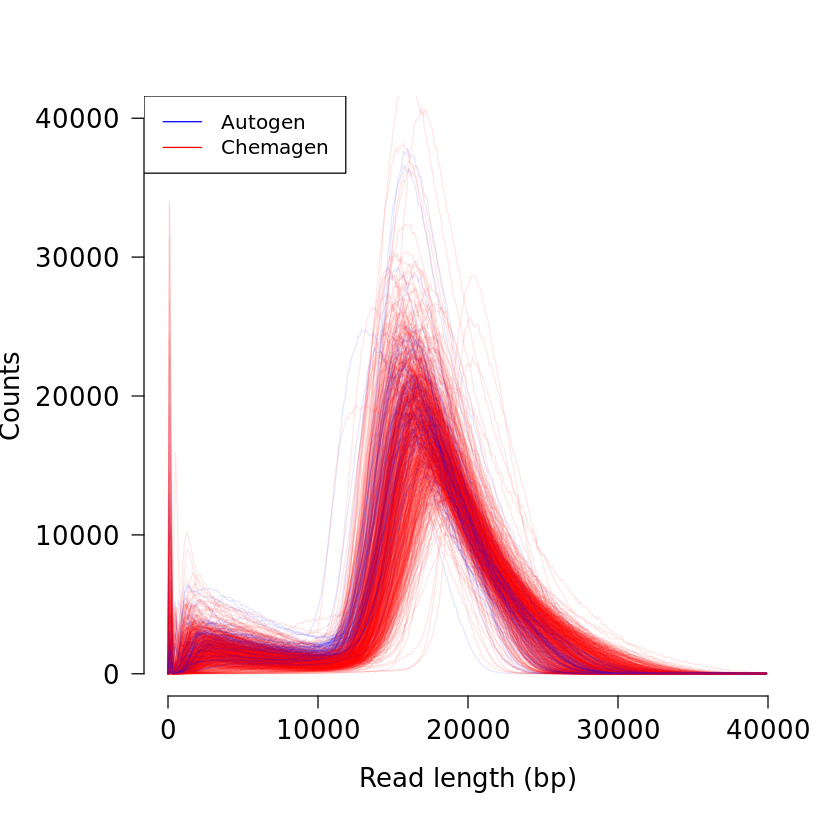

In [56]:
par(mar=c(6, 6, 4, 2))
plot(0, 0, type="n", lwd=1, las=1, ylab="", xlim=c(0, 40000), ylim=c(0, 40000), xlab="Read length (bp)", bty="n", cex.axis=1.3, cex.lab=1.3)
mtext("Counts", 2, line=5, cex=1.3)
legend("topleft", c("Autogen", "Chemagen"), col=c("#0000ff", "#ff0000"), lwd=1)

bases_in_reads_below_10kbp = c()
bases_in_reads_above_10kbp = c()
frac_reads_above_10kbp = c()

for (i in 2:ncol(df)) {
     if (full_df %>% filter(name == colnames(df)[i]) %>% nrow() == 1) {
        extraction = (full_df %>% filter(name == colnames(df)[i]) %>% pull(Extraction))[1]
         
        color = "#00ff0019"
        if (extraction == "Autogen") {
            color = "#0000ff19"
        } else if (extraction == "Chemagen") {
            color = "#ff000019"
        }

        points(df[,c(1, i)], type="l", col=color)

        bases_in_reads_below_10kbp = c(
            bases_in_reads_below_10kbp,
            sum(df[1:100,1] * df[1:100,i])
        )
         
        bases_in_reads_above_10kbp = c(
            bases_in_reads_above_10kbp,
            sum(df[101:nrow(df),1] * df[101:nrow(df),i])
        )
        
        frac_reads_above_10kbp = c(
            frac_reads_above_10kbp,
            sum(df[101:nrow(df),i]) / sum(df[,i])
        )
    }
}

In [45]:
df[1:3,1]
df[1:3,2]
sum( df[,1] * df[,2] ) / 3e9

[1]   0 100 200

[1]  2061 17608 12100

[1] 8.517433

In [91]:
df[,j]

[1]     0     0     0     0     1     0     1     1     1     2     2    12
 [13]    32    50    63    59    40    46    56    33    29    25    29    33
 [25]    37    18    25    22    30    24    23    18    19    15    20    20
 [37]    18    22    22    17    14    13    20     9    13    11    11    19
 [49]     4    18    11    20    25    13    13    10    14    22    10    12
 [61]    22     7    13    18    10    20    17    17    14    15    21    19
 [73]    21    14    13    17    14    16    14    18    23    21    16    21
 [85]    23    14    34    24    10    34    20    36    42    22    34    46
 [97]    26    43    34    51    46    64    52    62    64    38    61    58
[109]    53    90    77    78   110    99   103   103    90   107   104   100
[121]   123   110   106   123   131   116   153   151   135   137   149   144
[133]   170   167   180   170   181   212   193   179   201   212   201   239
[145]   218   231   240   247   225   218   251   277   295   270   262   289
[157]   303   287   355   369   371   442   517   563   574   687   837   912
[169]   964  1160  1273  1417  1601  1838  2060  2328  2617  3034  3602  4024
[181]  4585  5355  6285  7373  8804 10040 11333 12618 14156 15344 17023 18118
[193] 19475 20835 21608 22369 23188 23918 24832 24931

In [89]:
df[,1] * df[,j]

[1]         0         0         0         0       400         0       600
  [8]       700       800      1800      2000     13200     38400     65000
 [15]     88200     88500     64000     78200    100800     62700     58000
 [22]     52500     63800     75900     88800     45000     65000     59400
 [29]     84000     69600     69000     55800     60800     49500     68000
 [36]     70000     64800     81400     83600     66300     56000     53300
 [43]     84000     38700     57200     49500     50600     89300     19200
 [50]     88200     55000    102000    130000     68900     70200     55000
 [57]     78400    125400     58000     70800    132000     42700     80600
 [64]    113400     64000    130000    112200    113900     95200    103500
 [71]    147000    134900    151200    102200     96200    127500    106400
 [78]    123200    109200    142200    184000    170100    131200    174300
 [85]    193200    119000    292400    208800     88000    302600    180000
 [92]    327600    386400    204600    319600    437000    249600    417100
 [99]    333200    504900    460000    646400    530400    638600    665600
[106]    399000    646600    620600    572400    981000    847000    865800
[113]   1232000   1118700   1174200   1184500   1044000   1251900   1227200
[120]   1190000   1476000   1331000   1293200   1512900   1624400   1450000
[127]   1927800   1917700   1728000   1767300   1937000   1886400   2244000
[134]   2221100   2412000   2295000   2461600   2904400   2663400   2488100
[141]   2814000   2989200   2854200   3417700   3139200   3349500   3504000
[148]   3630900   3330000   3248200   3765000   4182700   4484000   4131000
[155]   4034800   4479500   4726800   4505900   5609000   5867100   5936000
[162]   7116200   8375400   9176900   9413600  11335500  13894200  15230400
[169]  16195200  19604000  21641000  24230700  27537200  31797400  35844000
[176]  40740000  46059200  53701800  64115600  72029600  82530000  96925500
[183] 114387000 134925900 161993600 185740000 210793800 235956600 266132800
[190] 290001600 323437000 346053800 373920000 402115500 419195200 436195500
[197] 454484800 471184600 491673600 496126900

In [38]:
sum(df[101:nrow(df),1] * df[101:nrow(df),i]) / (8*3e9)

[1] 0.4136132

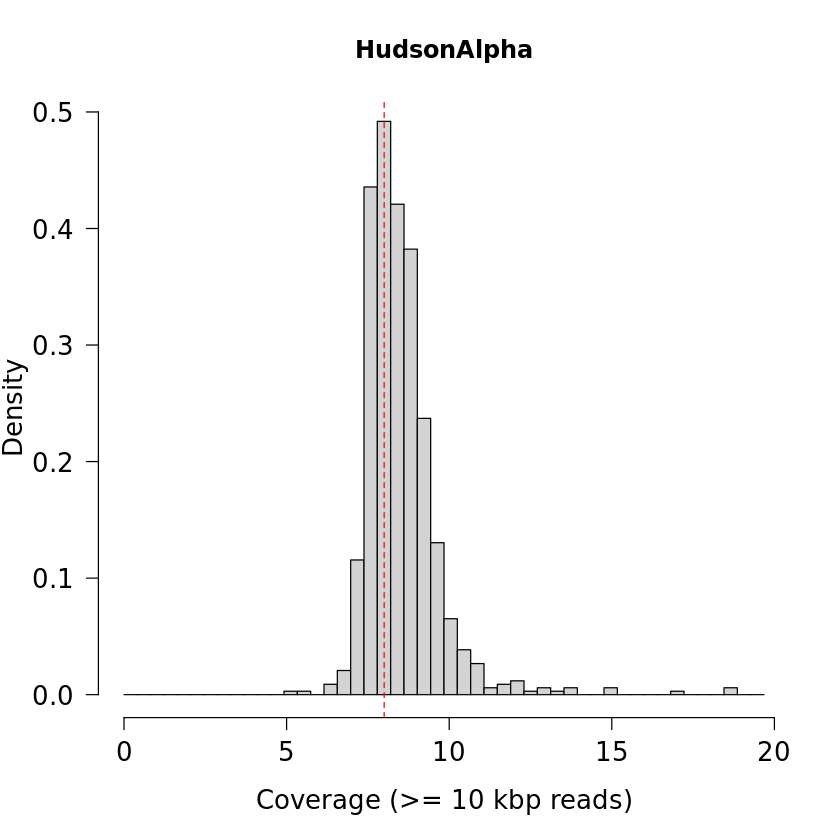

In [135]:
hist(bases_in_reads_above_10kbp / (3e9), las=1, breaks=seq(0, 20, by=0.41), probability = TRUE, cex.lab=1.3, cex.axis=1.3, main='HudsonAlpha', xlab='Coverage (>= 10 kbp reads)')
abline(v=8, col="red", lty=2)

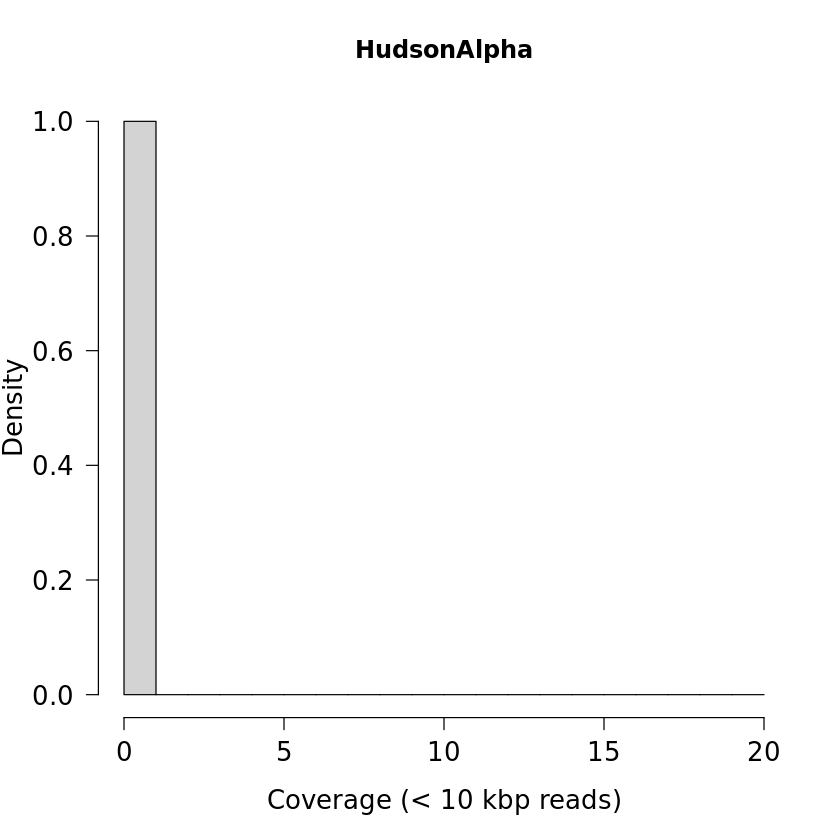

In [139]:
hist(bases_in_reads_below_10kbp / (3e9), las=1, breaks=seq(0, 20, by=1), probability=TRUE, cex.lab=1.3, cex.axis=1.3, main='HudsonAlpha', xlab='Coverage (< 10 kbp reads)')


In [134]:
sum((bases_in_reads_above_10kbp / (3e9)) < 7.5) / length(bases_in_reads_above_10kbp)

[1] 0.1020656

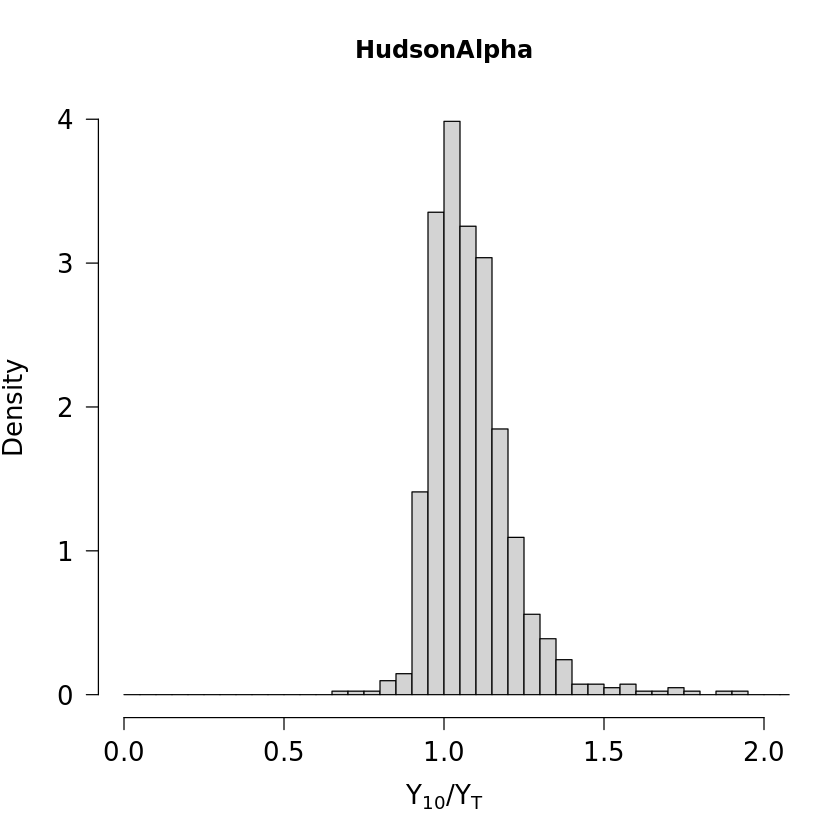

In [140]:
hist(bases_in_reads_above_10kbp / (23.5e9), las=1, xlim=c(0, 2.0), breaks=seq(0, 3, by=0.05), probability=TRUE, cex.lab=1.3, cex.axis=1.3, main='HudsonAlpha', xlab=expression('Y'[10]*'/Y'[T]))


In [116]:
mean(frac_reads_above_10kbp)

[1] 0.9178788

In [62]:
min_max_norm <- function(x) {
    (x - min(x)) / (max(x) - min(x))
}

[1] 30
[1] 422
[1] 130


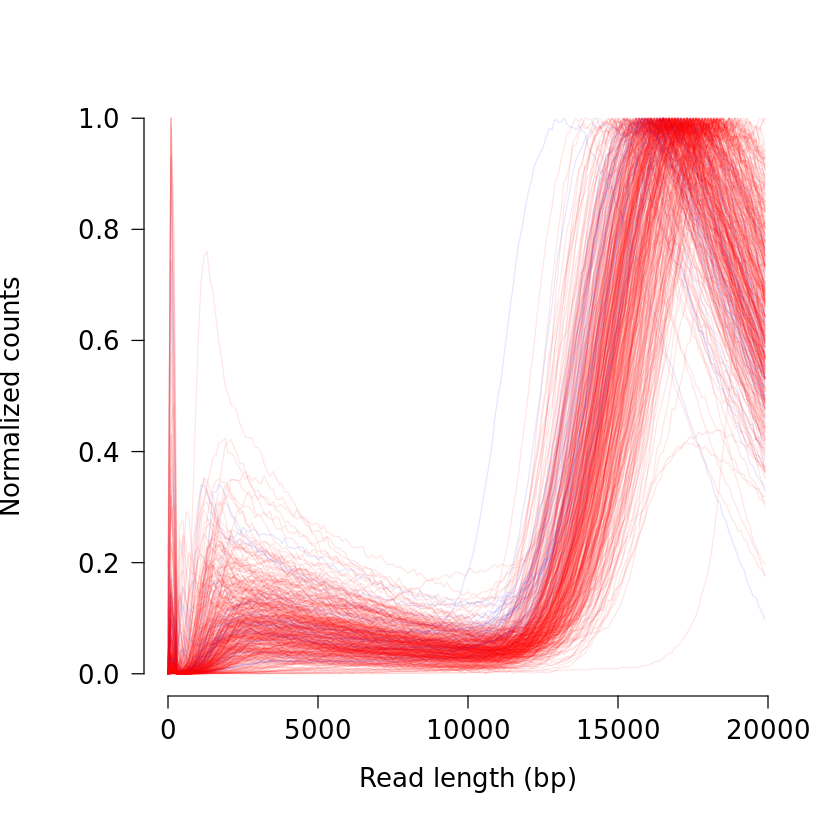

In [85]:
par(mar=c(6, 6, 4, 2))
plot(0, 0, type="n", lwd=1, las=1, ylab="", xlim=c(0, 20000), ylim=c(0, 1.0), xlab="Read length (bp)", bty="n", cex.axis=1.3, cex.lab=1.3)
mtext("Normalized counts", 2, line=5, cex=1.3)

autogen = 0
chemagen = 0
other = 0

for (i in 2:ncol(df)) {
    if (full_df %>% filter(name == colnames(df)[i]) %>% nrow() == 1) {
        extraction = (full_df %>% filter(name == colnames(df)[i]) %>% pull(Extraction))[1]
        if (extraction == "Autogen") {
            color = "#0000ff19"
            autogen = autogen + 1
        } else {
            color = "#ff000019"
            chemagen = chemagen + 1
        }

        points(df[,1], min_max_norm(df[,i]), type="l", col=color)
    } else {
        other = other + 1
    }
}

print(autogen)
print(chemagen)
print(other)

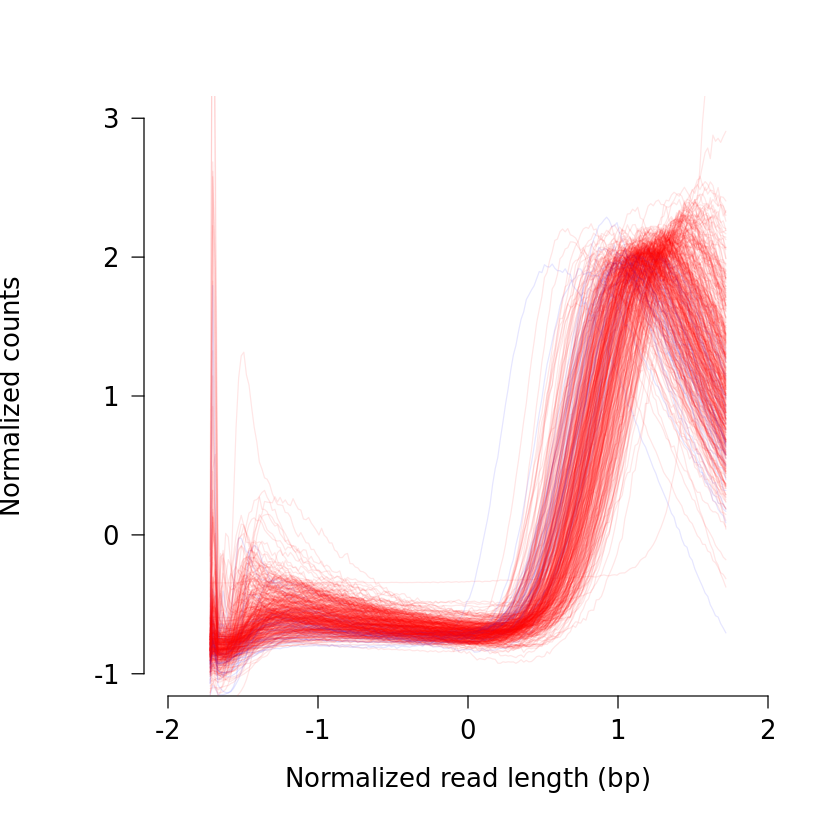

In [80]:
par(mar=c(6, 6, 4, 2))
plot(0, 0, type="n", lwd=1, las=1, ylab="", xlim=c(-2, 2), ylim=c(-1, 3), xlab="Normalized read length (bp)", bty="n", cex.axis=1.3, cex.lab=1.3)
mtext("Normalized counts", 2, line=5, cex=1.3)

for (i in 2:ncol(df)) {
    if (full_df %>% filter(name == colnames(df)[i]) %>% nrow() == 1) {
        extraction = (full_df %>% filter(name == colnames(df)[i]) %>% pull(Extraction))[1]
        if (extraction == "Autogen") {
            color = "#0000ff19"
        } else {
            color = "#ff000019"
        }

        points(scale(df[,c(1, i)]), type="l", col=color)
    }
}

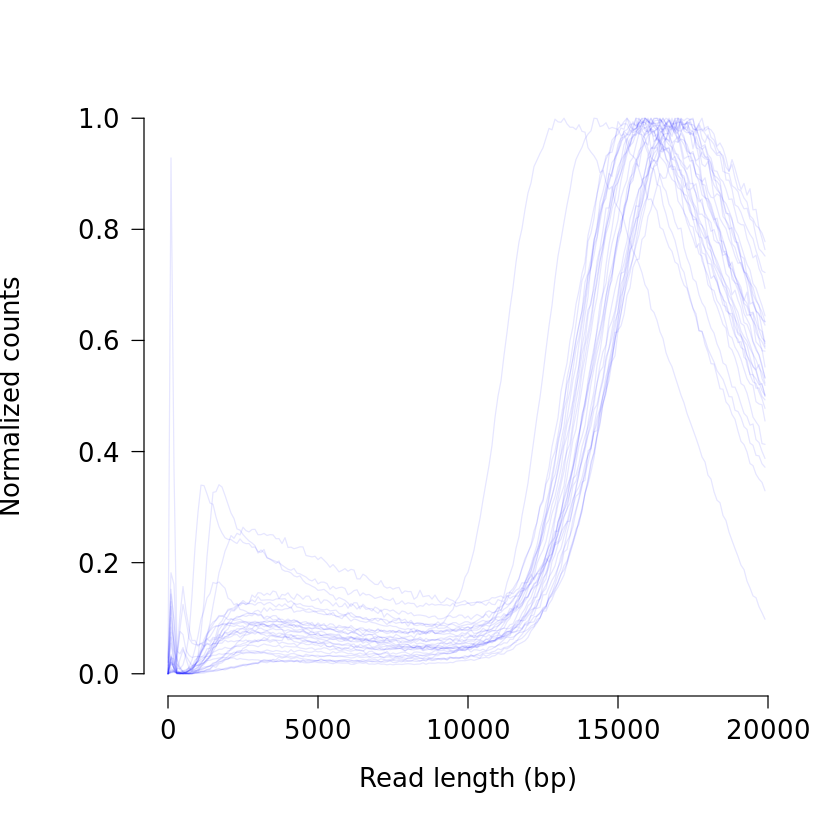

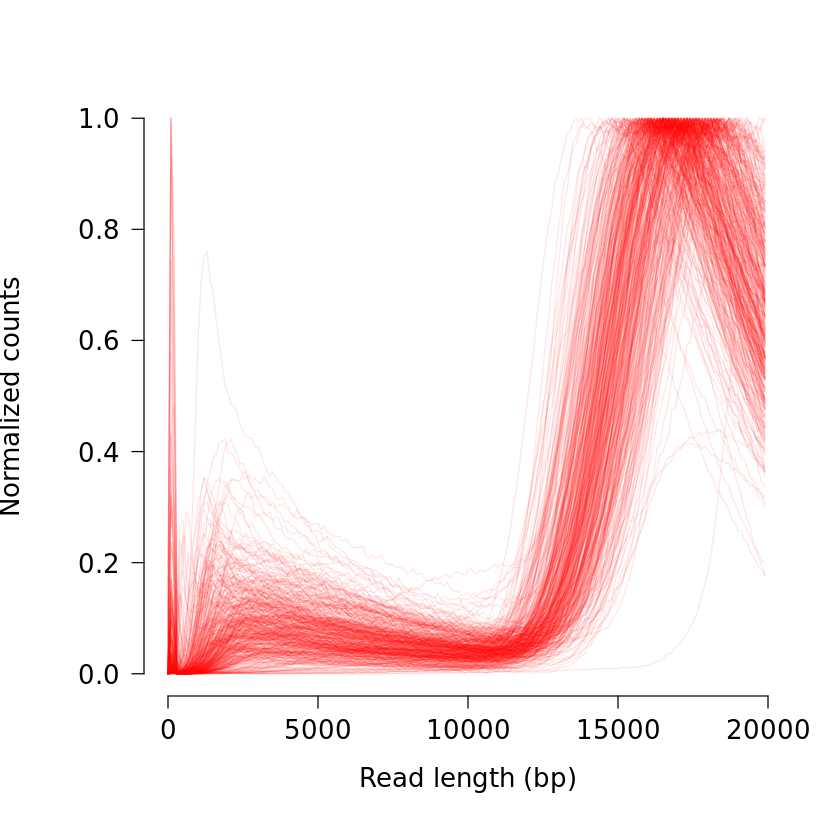

In [79]:
par(mar=c(6, 6, 4, 2))
plot(0, 0, type="n", lwd=1, las=1, ylab="", xlim=c(0, 20000), ylim=c(0, 1.0), xlab="Read length (bp)", bty="n", cex.axis=1.3, cex.lab=1.3)
mtext("Normalized counts", 2, line=5, cex=1.3)

for (i in 2:ncol(df)) {
    if (full_df %>% filter(name == colnames(df)[i]) %>% nrow() == 1) {
        extraction = (full_df %>% filter(name == colnames(df)[i]) %>% pull(Extraction))[1]
        if (extraction == "Autogen") {
            points(df[,1], min_max_norm(df[,i]), type="l", col="#0000ff19")
        }
    }
}

par(mar=c(6, 6, 4, 2))
plot(0, 0, type="n", lwd=1, las=1, ylab="", xlim=c(0, 20000), ylim=c(0, 1.0), xlab="Read length (bp)", bty="n", cex.axis=1.3, cex.lab=1.3)
mtext("Normalized counts", 2, line=5, cex=1.3)

for (i in 2:ncol(df)) {
    if (full_df %>% filter(name == colnames(df)[i]) %>% nrow() == 1) {
        extraction = (full_df %>% filter(name == colnames(df)[i]) %>% pull(Extraction))[1]
        if (extraction == "Chemagen") {
            points(df[,1], min_max_norm(df[,i]), type="l", col="#ff000019")
        }
    }
}

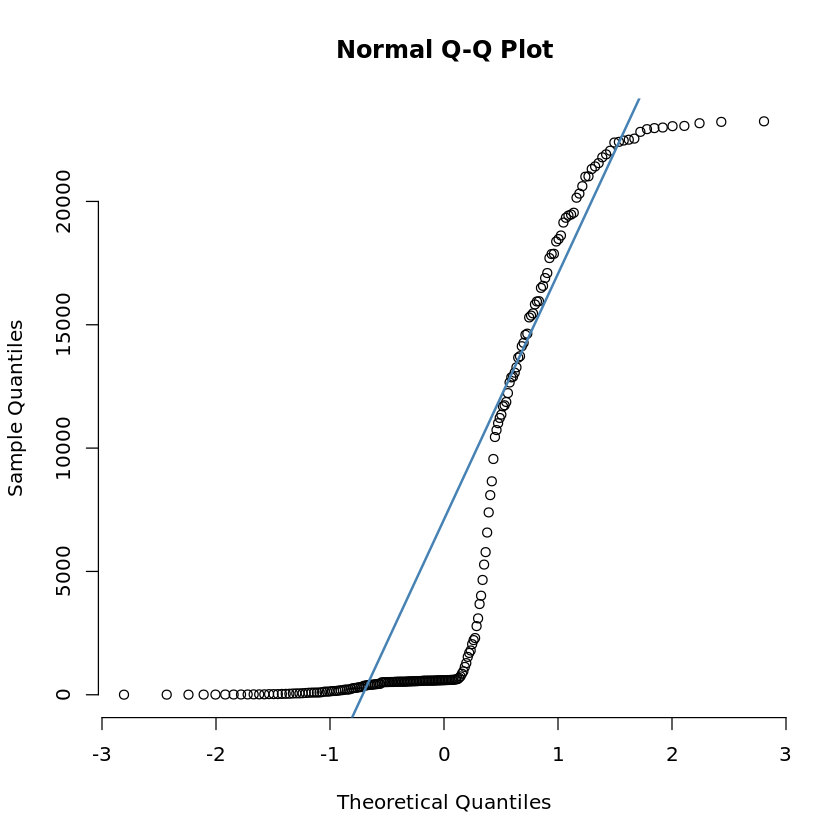

In [68]:
q = 13
qqnorm(df[,q], pch = 1, frame = FALSE)
qqline(df[,q], col = "steelblue", lwd = 2)

In [69]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




[1] 176 178

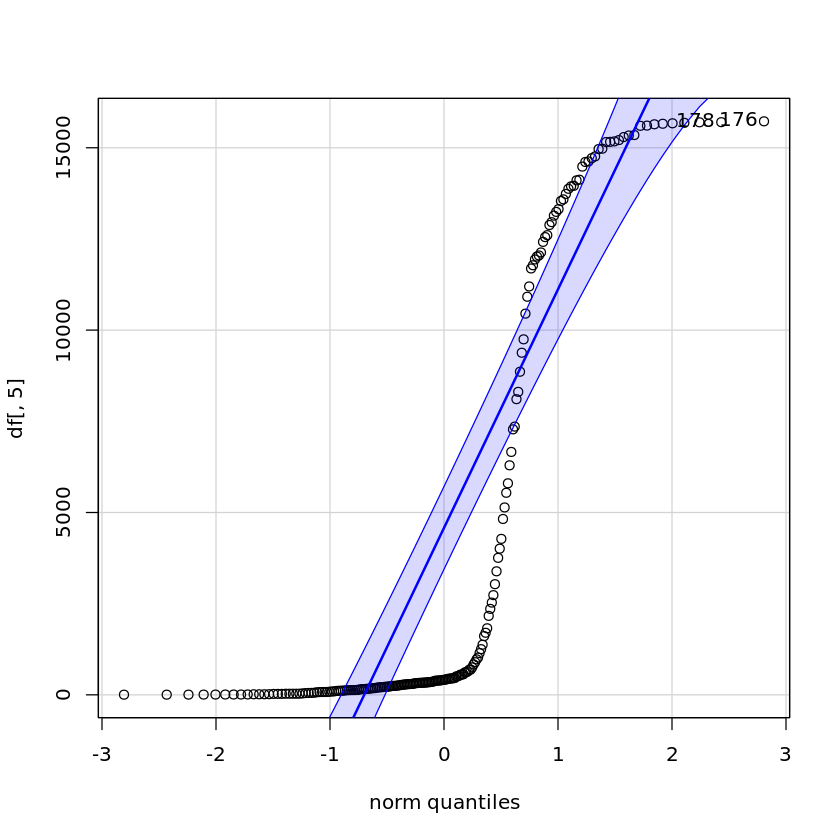

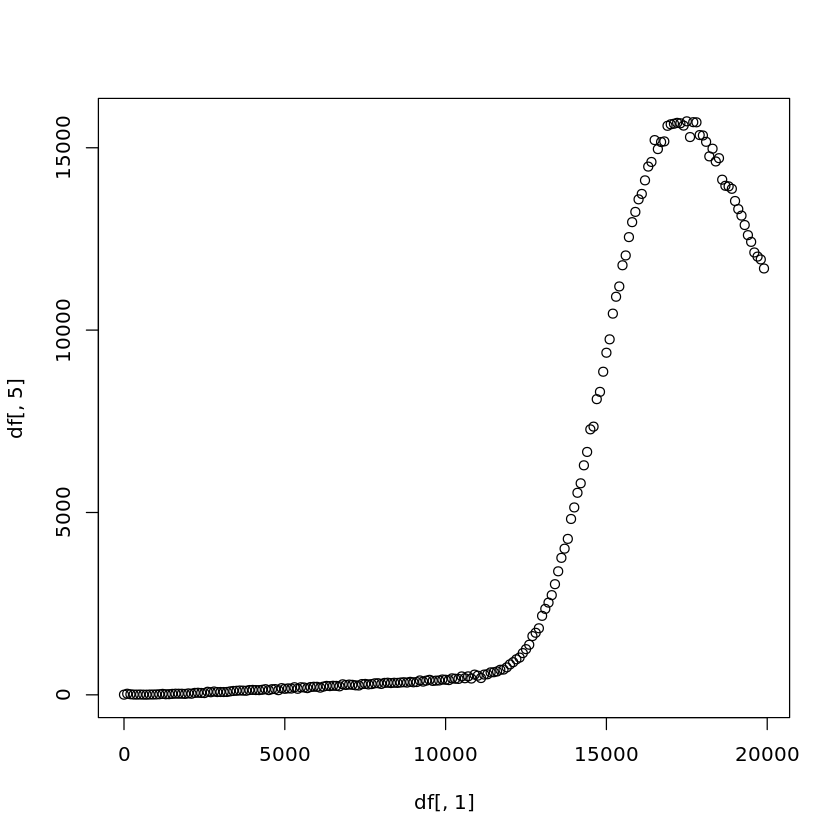

In [70]:
qqPlot(df[,5])
plot(df[,1], df[,5])

In [210]:
df

bin,DA163307-bc2024,DA163308-bc2021,DA163379-bc2022,DA169674-bc2089,DA202633-bc2079,DA207370-bc2003,DA212037-bc2062,DA212056-bc2017,DA212060-bc2079,⋯,DA228567-bc2054,DA228568-bc2044,DA228571-bc2010,DA228578-bc2009,DA228580-bc2026,DA229861-bc2064,DA229882-bc2066,DA229917-bc2046,DA229928-bc2043,DA229930-bc2091
0,0,0,2,2,5,0,3,4,2,⋯,4,3,0,1,7,1,8,0,1,6
100,1,3,2,2,3,2,1,1,3,⋯,1,0,5,7,2,2,1,2,2,1
200,0,8,1,2,2,8,0,3,1,⋯,0,0,4,5,0,1,0,2,0,1
300,0,12,3,1,5,3,0,0,0,⋯,3,0,5,6,1,1,0,3,1,0
400,1,17,6,5,5,7,3,1,0,⋯,4,5,7,9,1,0,2,1,1,1
500,4,12,3,6,7,7,2,2,3,⋯,3,5,6,11,1,2,7,4,1,2
600,6,20,3,5,10,4,6,7,3,⋯,5,6,7,8,5,6,12,9,6,1
700,3,11,3,6,19,7,6,10,8,⋯,3,11,18,24,12,5,27,10,7,3
800,7,14,9,9,13,14,6,17,10,⋯,7,16,26,42,16,20,58,22,10,4
900,11,11,3,12,30,22,10,25,20,⋯,8,36,44,101,11,29,115,35,19,6
